In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [4]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [5]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [6]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [7]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [8]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [9]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,1,0,7.2500,S,1,2
1,1,1,1,38.0,1,0,71.2833,C,3,2
2,1,3,1,26.0,0,0,7.9250,S,2,1
3,1,1,1,35.0,1,0,53.1000,S,3,2
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [10]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,S,1,2
1,1,1,1,38.0,71.2833,C,3,2
2,1,3,1,26.0,7.9250,S,2,1
3,1,1,1,35.0,53.1000,S,3,2
4,0,3,0,35.0,8.0500,S,1,1


In [11]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,0,1,2
1,1,1,1,38.0,71.2833,1,3,2
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,2
4,0,3,0,35.0,8.0500,0,1,1


In [12]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.361392,1.728395,1.904602
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.635673,1.030039,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,5.000000,11.000000


In [13]:
# train_age_df = train_df.dropna()
# X_train = train_age_df.drop("Age", axis=1)
# Y_train = train_age_df["Age"]
# x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)
# # print(y_train)
# reg = LinearSVR(random_state=0, tol=1e-5)
# reg.fit(x_train, y_train)
# pred = reg.predict(x_test)
# plt.figure(figsize=(10,6), dpi=100)
# plt.plot(np.array(y_test), c='r')
# plt.plot(pred, c='b')
# # plt.savefig('tenki_prediction.png')
# plt.show()
# print(reg.score(x_test, y_test))# 

In [14]:
# X_train.isnull()
# Y_train.isnull().sum()
# np.isinf(X_train)

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


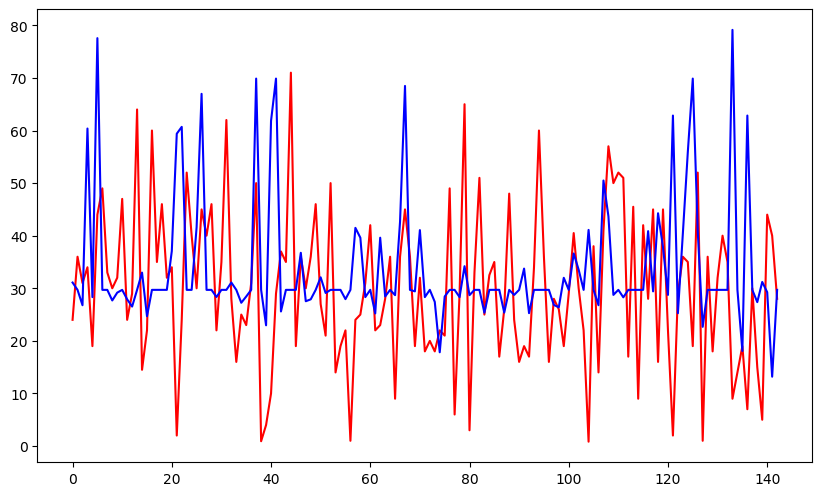

-6654.690150019462


In [15]:
from sklearn.preprocessing import PolynomialFeatures

train_age_df = train_df.dropna()
X_train = train_age_df.drop("Age", axis=1)
Y_train = train_age_df["Age"]
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.fit_transform(x_test)
# print(y_train)
reg = LinearSVR(random_state=0, tol=1e-5)
reg.fit(x_train_poly, y_train)
pred = reg.predict(x_test_poly)
pred = np.where(pred > 80, train_df["Age"].mean(), pred)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('tenki_prediction.png')
plt.show()
print(reg.score(x_test_poly, y_test))

# a = train_df[train_df['Age'].isnull()]
# a_x = a.drop("Age", axis=1)
# # a_x.head()
# a_x_poly = poly_reg.fit_transform(a_x)
# b = reg.predict(a_x_poly)
# plt.figure(figsize=(10,6), dpi=100)
# plt.plot(b, c='b')
# # plt.savefig('tenki_prediction.png')
# plt.show()
# print(b)